In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset_train = pd.read_csv('TSLA.csv')
dataset_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-08-16,45.098000,45.438000,44.681999,44.722000,44.722000,11335500
1,2016-08-17,44.866001,44.966000,44.560001,44.647999,44.647999,8935500
2,2016-08-18,44.764000,45.132000,44.458000,44.702000,44.702000,8572500
3,2016-08-19,44.708000,45.034000,44.506001,45.000000,45.000000,8297500
4,2016-08-22,44.834000,45.021999,44.535999,44.585999,44.585999,10327500
...,...,...,...,...,...,...,...
1253,2021-08-09,710.169983,719.030029,705.130005,713.760010,713.760010,14715300
1254,2021-08-10,713.989990,716.590027,701.880005,709.989990,709.989990,13432300
1255,2021-08-11,712.710022,715.179993,704.210022,707.820007,707.820007,9800600
1256,2021-08-12,706.340027,722.799988,699.400024,722.250000,722.250000,17459100


In [4]:
dataset_train.shape

(1258, 7)

In [5]:
dataset_train.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [7]:
training = dataset_train.iloc[: , 1:2].values

In [8]:
print(training)
print(training.shape)

[[ 45.098   ]
 [ 44.866001]
 [ 44.764   ]
 ...
 [712.710022]
 [706.340027]
 [723.710022]]
(1258, 1)


In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_training_set = scaler.fit_transform(training)

scaled_training_set

array([[0.01038168],
       [0.01011039],
       [0.00999111],
       ...,
       [0.79106836],
       [0.78361947],
       [0.80393145]])

In [11]:
a_train = []
b_train = []
for i in range(60 , 1258):
  a_train.append(scaled_training_set[i-60: i, 0])
  b_train.append(scaled_training_set[i,0])

a_train = np.array(a_train)
b_train = np.array(b_train)


In [12]:
print(a_train.shape)
print(b_train.shape)

(1198, 60)
(1198,)


In [13]:
a_train = np.reshape(a_train , (a_train.shape[0], a_train.shape[1] ,1))
a_train.shape

(1198, 60, 1)

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

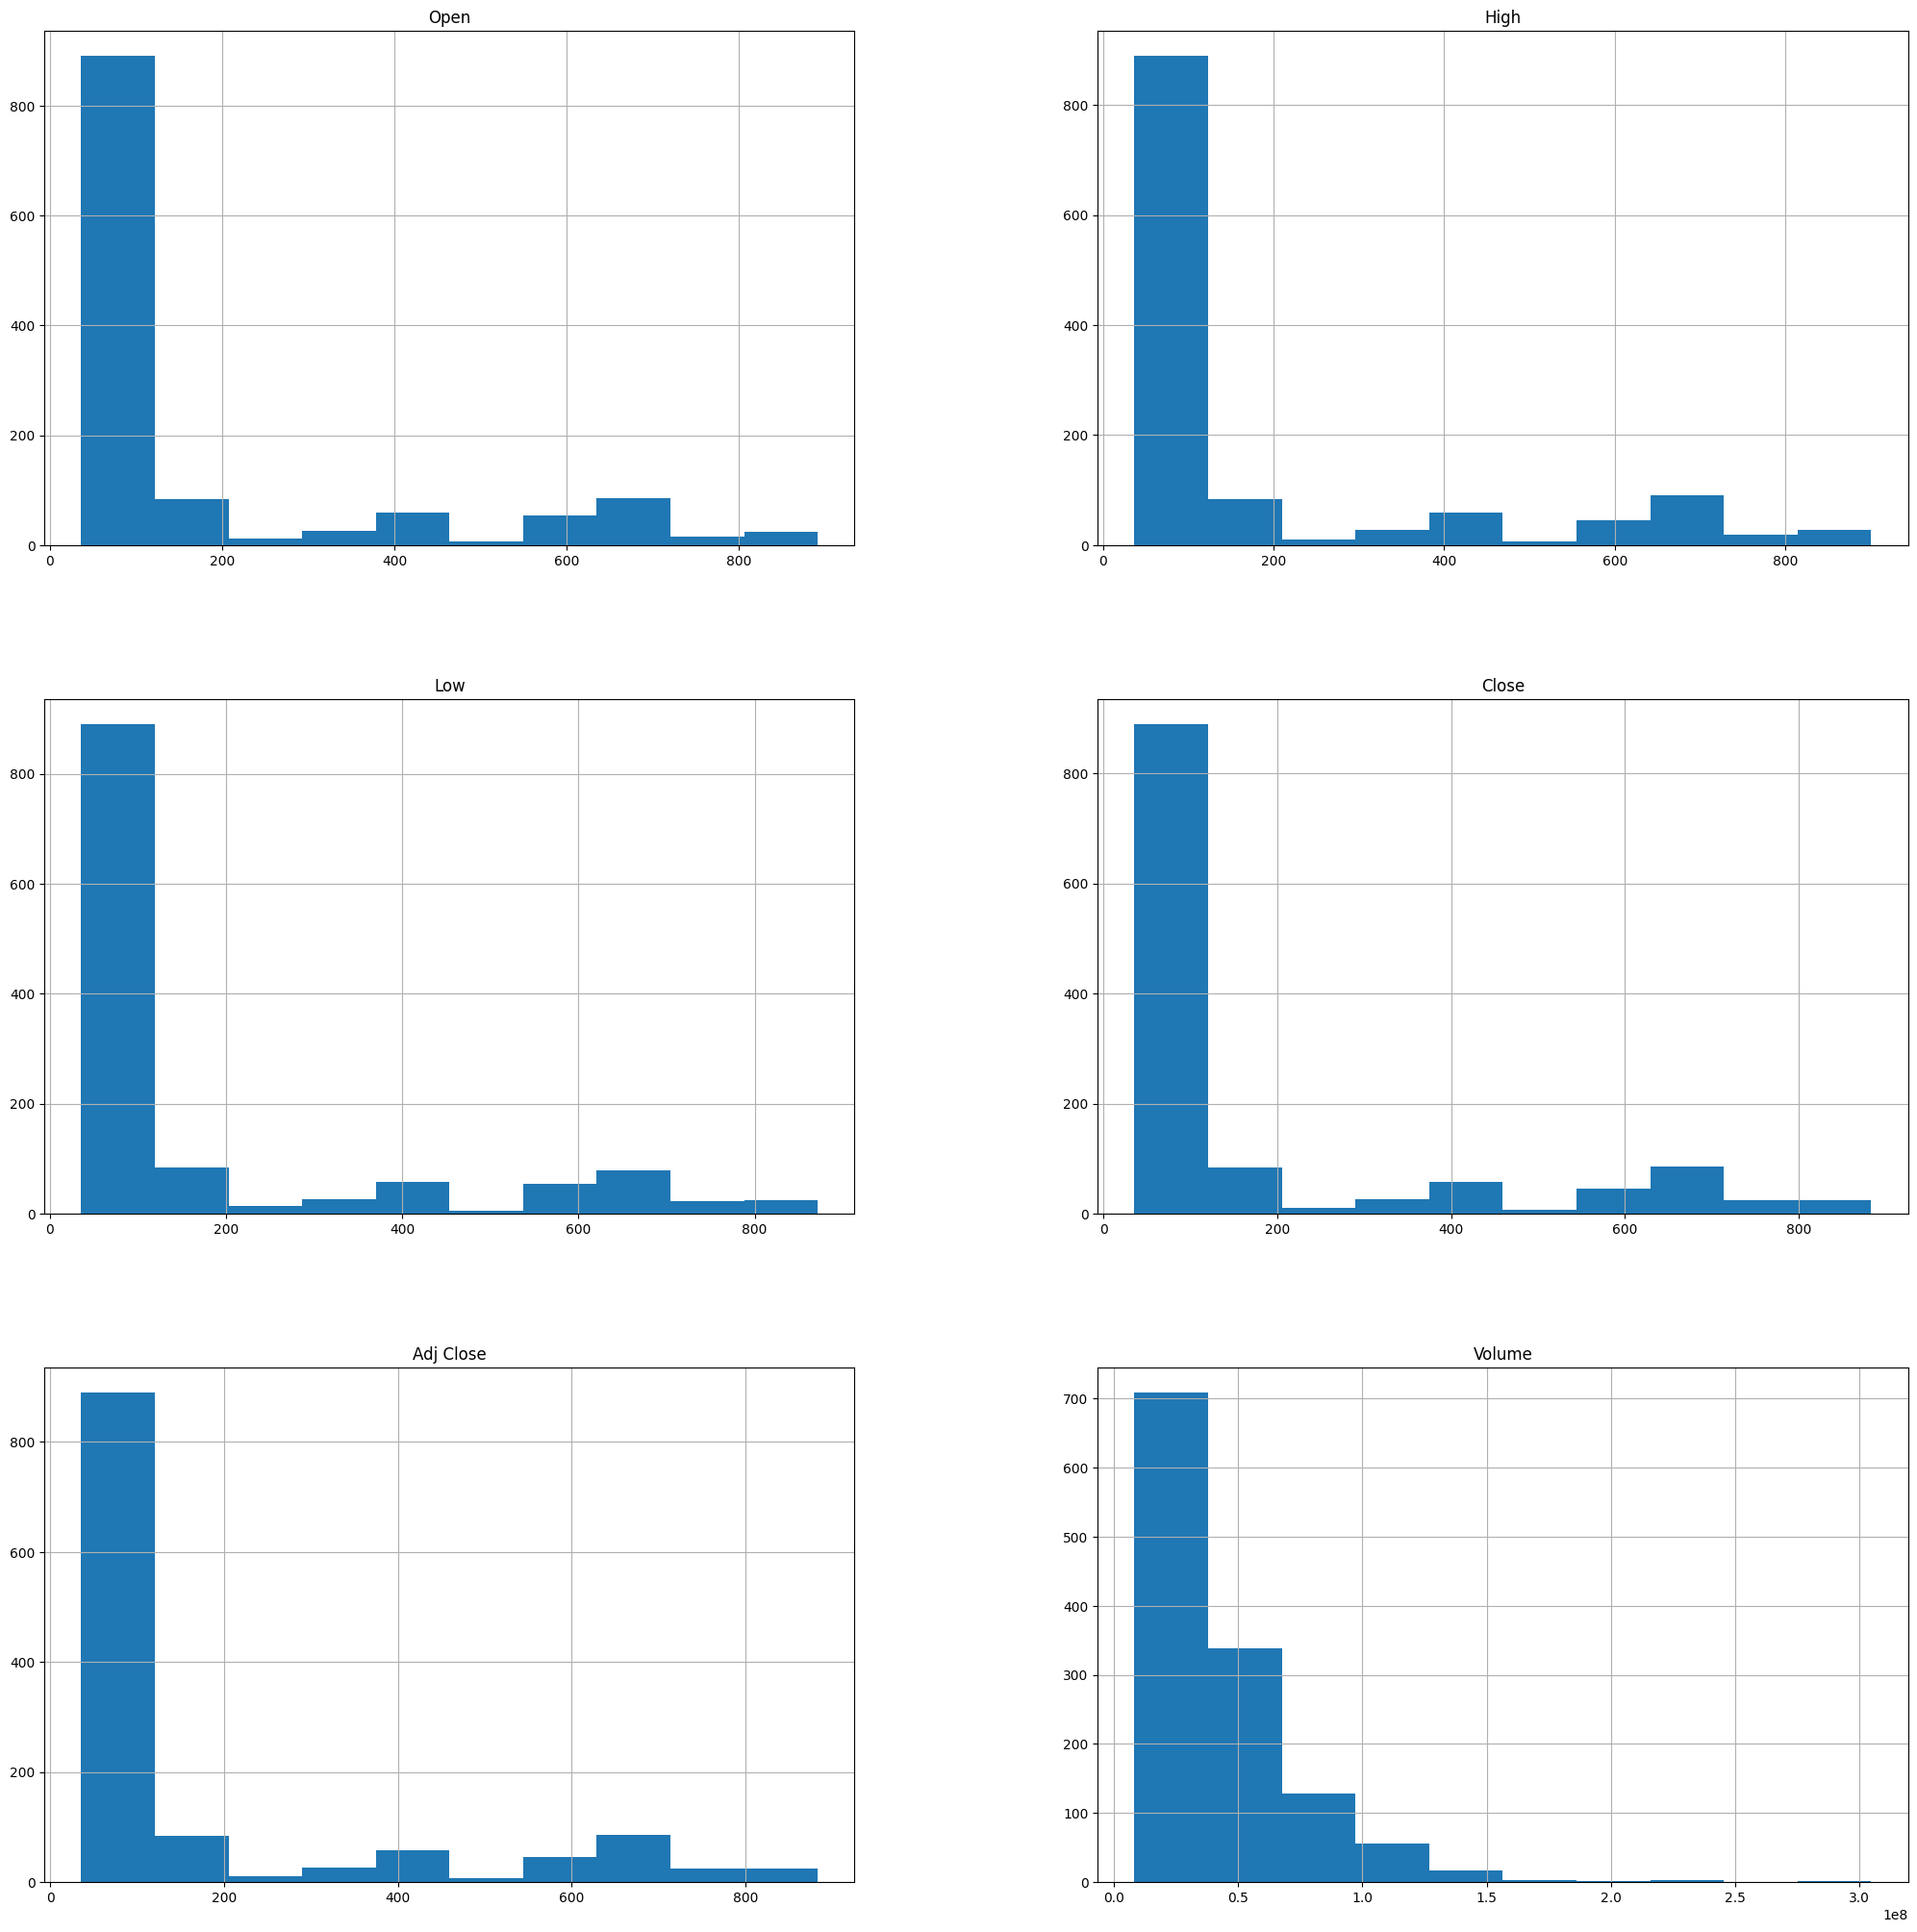

In [14]:
dataset_train.hist(figsize=(25,25))

Open
1.6309131781758814
High
1.6218486948369168
Low
1.6393685444214856
Close
1.6293024641907856
Adj Close
1.6293024641907856
Volume
2.3957955052074755


<Figure size 640x480 with 0 Axes>

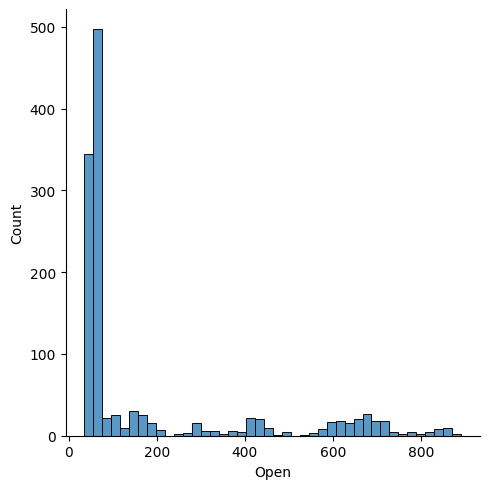

<Figure size 640x480 with 0 Axes>

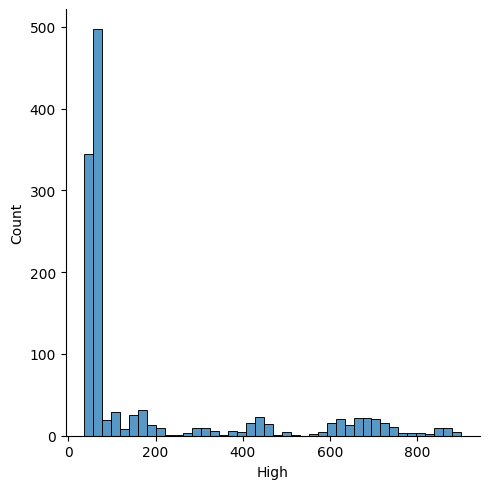

<Figure size 640x480 with 0 Axes>

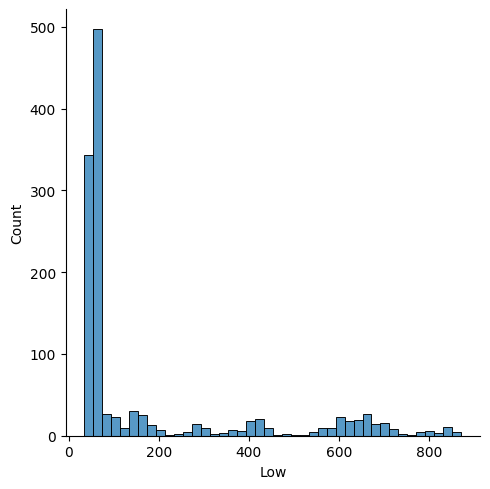

<Figure size 640x480 with 0 Axes>

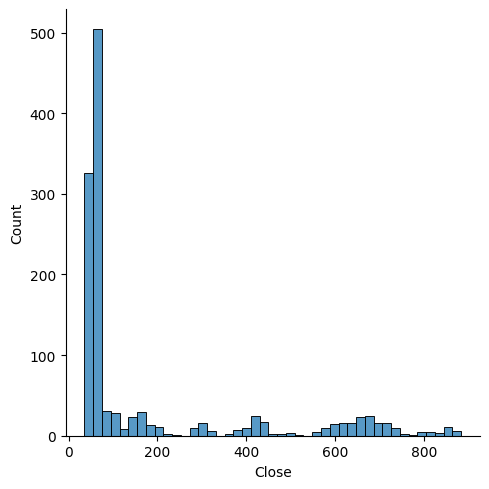

<Figure size 640x480 with 0 Axes>

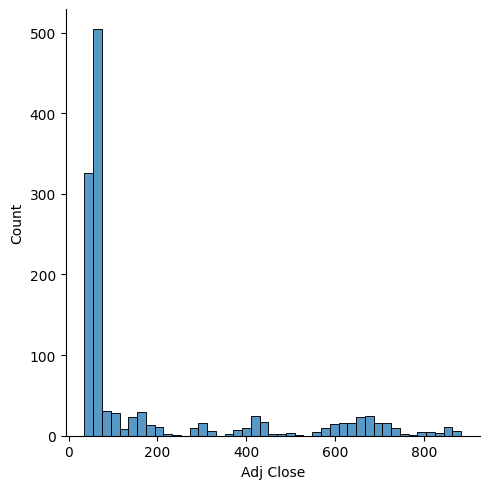

<Figure size 640x480 with 0 Axes>

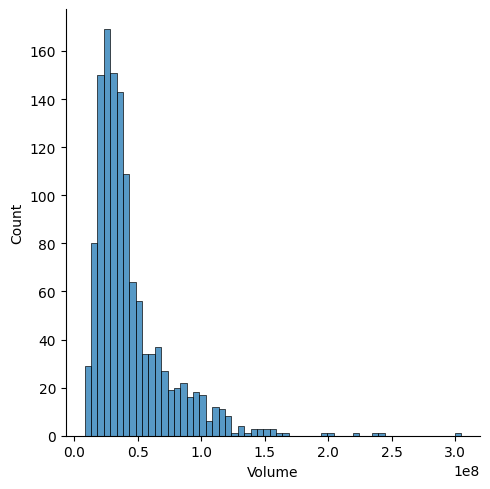

In [16]:
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming 'date' is a non-numeric column that you want to exclude
numeric_columns = dataset_train.select_dtypes(include=[np.number]).columns

for col in numeric_columns:
  print(col)
  print(skew(dataset_train[col]))
  plt.figure()
  sns.displot(dataset_train[col])

#LSTM

In [17]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [19]:
regressor = Sequential()
regressor.add(LSTM(units = 50 , return_sequences = True ,input_shape = (a_train.shape[1] , 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50 , return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50 , return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [23]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
import tensorflow as tf
# Create a Sequential model
regressor = Sequential()
# Add LSTM layers
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(a_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# Add the output layer
regressor.add(Dense(units=1))
# Compile the model
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(a_train , b_train , epochs = 100 , batch_size = 32)

Epoch 1/100
38/38 [==============================] - 14s 158ms/step - loss: 0.0176
Epoch 2/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0035
Epoch 3/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0028
Epoch 4/100
38/38 [==============================] - 6s 152ms/step - loss: 0.0034
Epoch 5/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0032
Epoch 6/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0033
Epoch 7/100
38/38 [==============================] - 6s 155ms/step - loss: 0.0033
Epoch 8/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0032
Epoch 9/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0030
Epoch 10/100
38/38 [==============================] - 6s 151ms/step - loss: 0.0023
Epoch 11/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0026
Epoch 12/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0023
Epoch 13/100

#Prediction Using LSTM & .iloc

In [24]:
dataset_test = pd.read_csv('TSLA.csv')
actual_stock_price = dataset_test.iloc[:,1:2].values

In [27]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']) , axis = 0)
inputs = dataset_total[len(dataset_test) - 60:].values
inputs = inputs.reshape(-1 , 1)
inputs = scaler.transform(inputs)
x_test = []
for i in range(60 , 80):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test , (x_test.shape[0], x_test.shape[1], 1))
x_test = np.reshape(x_test , (x_test.shape[0] , x_test.shape[1] , 1))

In [28]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


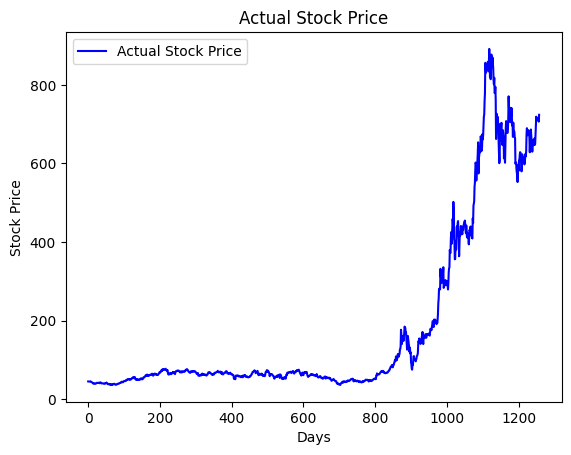

In [29]:
plt.plot(actual_stock_price , color = 'blue' , label = 'Actual Stock Price')
#plt.plot(predicted_stock_price , color = 'blue' , label = 'Predicted Stock Price')
plt.title('Actual Stock Price')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()

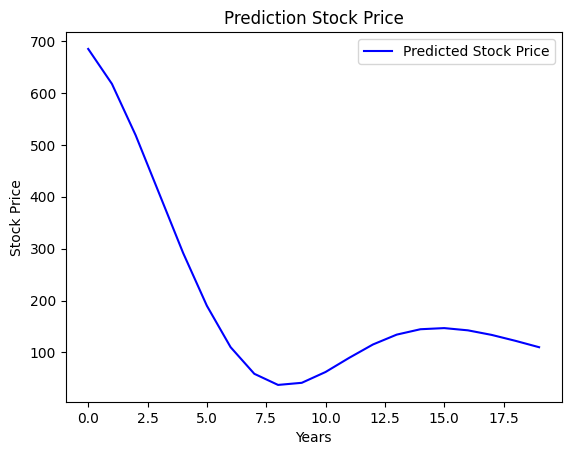

In [30]:
#plt.plot(actual_stock_price, color='red', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Prediction Stock Price')
plt.xlabel('Years')
plt.ylabel('Stock Price')
plt.legend()
plt.show()